<a href="https://colab.research.google.com/github/fadillarizalul/datacamp-hr-analytics/blob/main/datacamp_predict_employee_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("employee_turnover.csv")
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.tail()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


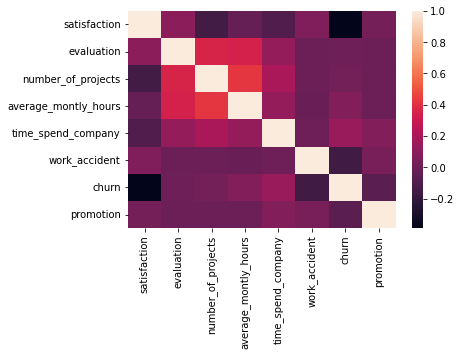

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

In [9]:
print("jenis-jenis salary: ", data.salary.unique())

jenis-jenis salary:  ['low' 'medium' 'high']


In [10]:
print("jenis-jenis department: ", data.department.unique())

jenis-jenis department:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


Variable Salary which is ORDINAL

In [11]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low','medium','high'])

# Encode categories with integer values
data.salary = data.salary.cat.codes

data.salary

0        0
1        1
2        1
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: salary, Length: 14999, dtype: int8

Variable DEPARTMENT which is NOMINAL

In [12]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)
departments

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


AVOIDING DUMMY TRAP BY ADJUSTING N-1 VALUES

In [13]:
departments = departments.drop("technical", axis=1)

In [14]:
departments.columns

Index(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support'],
      dtype='object')

In [15]:
# Join the new DataFrame "departments" to your employee dataset: done
data = data.join(departments)
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
data

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1
14995,0.37,0.48,2,160,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1
14996,0.37,0.53,2,143,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1
14997,0.11,0.96,6,280,4,0,1,0,support,0,0,0,0,0,0,0,0,0,1


In [18]:
data

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1
14995,0.37,0.48,2,160,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1
14996,0.37,0.53,2,143,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1
14997,0.11,0.96,6,280,4,0,1,0,support,0,0,0,0,0,0,0,0,0,1


In [19]:
data = data.drop('department', axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   salary                14999 non-null  int8   
 9   IT                    14999 non-null  uint8  
 10  RandD                 14999 non-null  uint8  
 11  accounting            14999 non-null  uint8  
 12  hr                    14999 non-null  uint8  
 13  management            14999 non-null  uint8  
 14  marketing             14999 non-null  uint8  
 15  product_mng        

In [21]:
# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn", axis=1)

In [22]:
target_train, target_test, features_train, features_test = train_test_split(target, features, test_size=0.25)

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=42)

In [24]:
print('score for train model: ', model.score(features_train,target_train)*100)

score for train model:  100.0


In [25]:
print('score for test model: ', model.score(features_test,target_test)*100)

score for test model:  98.4


In [26]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train,target_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(features_test,target_test)*100)

97.4842208196284
97.81333333333333


In [27]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train, target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train,target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test,target_test)*100)

96.36412125522268
96.56


USING PRECISION, RECALL, AUC METRICS

In [28]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [29]:
prediction = model.predict(features_test)

In [30]:
print("score of precision: ", precision_score(target_test, prediction))

score of precision:  0.9588431590656284


In [31]:
print("score of recall: ", recall_score(target_test, prediction))

score of recall:  0.9740112994350283


In [32]:
print("score of auc: ", roc_auc_score(target_test, prediction))

score of auc:  0.9805484071346171


USING CLASS_WEIGHT = "BALANCED"

In [33]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test, target_test)*100)

94.39999999999999


In [34]:
# Print the recall score
print(recall_score(target_test,prediction))
# Print the ROC/AUC score
print(roc_auc_score(target_test,prediction))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7, class_weight="balanced", random_state=42)

# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)

# Make prediction of model depth 7 using test component
prediction_b = model_depth_7_b.predict(features_test)

# Print the recall score for the balanced model depth 7
print(recall_score(target_test,prediction_b))

# Print the ROC/AUC score for the balanced model depth 7
print(roc_auc_score(target_test,prediction_b))

0.9740112994350283
0.9805484071346171
0.9423728813559322
0.964205637885645


K-Fold Cross-Val

In [35]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score
print(cross_val_score(model,features,target,cv=10))

[0.98466667 0.988      0.97066667 0.964      0.956      0.982
 0.988      0.99133333 1.         1.        ]


In [36]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]
samples = [i for i in range(50,500,50)]

In [37]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=3)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [45]:
model_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, class_weight="balanced", random_state=42)

In [51]:
model_best.fit(features,target)
feature_importances = model_best.feature_importances_

In [57]:
features.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion', 'salary', 'IT', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support'],
      dtype='object')

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.446651
time_spend_company,0.410256
evaluation,0.100637
average_montly_hours,0.036981
number_of_projects,0.005475
hr,0.000000
sales,0.000000
product_mng,0.000000
marketing,0.000000
management,0.000000


In [53]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

In [54]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)


95.89333333333333
92.88135593220339
94.85254533084864
